## ANÁLISIS DE DATOS PARA EMPRESA DE VIAJES URBANOS 

Una nueva empresa de viajes compartidos se está lanzando en Chicago. Se desea encontrar patrones en la información disponible para comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Con las base de datos, se analizarán los datos de los competidores y se probarán hipótesis sobre el impacto del clima en la frecuencia de los viajes.

El primer paso del procesamiento de datos se llevó a cabo con SQL. 
En este segundo paso se procesarán y tratarán los datos con Pyhton. 

---

Se tienen dos bases de datos CSV:

`project_sql_result_01.csv`. Contiene los siguientes datos:

- `company_name`: nombre de la empresa de taxis
- `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

`project_sql_result_04.csv`. Contiene los siguientes datos:

- `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes
- `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Para estos dos datasets se realizará lo siguiente:

1. importar los archivos
2. estudiar los datos que contienen
3. asegurar de que los tipos de datos sean correctos
4. identificar los 10 principales barrios en términos de finalización
5. hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
6. realizar conclusiones basadas en cada gráfico y explicar los resultados

#### Finalmente y como un último paso, se realizará una prueba de hipótesis

 `/project_sql_result_07.csv` — Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.
 
 Estos son los valores de campo de la tabla:

- `start_ts`: fecha y hora de la recogida
- `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje
- `duration_seconds`: duración del viaje en segundos

Se probará la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".


##### ETAPA 1: Estudiar los archivos y preparar los datos


Como primer paso se importarán las librerías necesarias para trabajar con la base de datos, se leerá la información y se corregirán errores de presentación como nombres de columnas (si son poco adecuados), errores de contenido como elementos duplicados y/ valores ausentes, además del tipo de dato adecuado para cada valor de información (object, float, int, datetime, etc), según sea el caso.

In [96]:
#se importan las librerias necesarias para realizar el proyecto
import pandas as pd   #para trabajar con DF 
import matplotlib.pyplot as plt   #para graficar 
from scipy import stats as st   #para realizar la prueba de hipótesis


In [97]:
#se leen las bases de datos 
df_trips_amount = pd.read_csv('moved_project_sql_result_01.csv') 
df_dropoff_location = pd.read_csv('moved_project_sql_result_04.csv')
df_loop_ohare = pd.read_csv('moved_project_sql_result_07.csv')


In [98]:
#leemos todas las bases de datos 
#se echa un vistazo a los nombres de las columnas y al tipo de datos que contienen
dataframes = [df_trips_amount, df_dropoff_location, df_loop_ohare]
for df in dataframes: 
    df.info() #se muestra la información general del dataframe
    print('columnas: ', df.columns) #se muestra el nombre de las columnas 
    print('\n')
    print('cantidad de datos nulos: \n', df.isna().sum()) #comprobamos si existen datos nulos en los DF
    print('cantidad de duplicados: ', df.duplicated().sum()) #comprobamos si existen datos duplicados
    print('\n')
    print(df.head()) #se muestran las primeras filas
    print('\n_______________________________________________')
    print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
columnas:  Index(['company_name', 'trips_amount'], dtype='object')


cantidad de datos nulos: 
 company_name    0
trips_amount    0
dtype: int64
cantidad de duplicados:  0


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

_______________________________________________


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  --

Al realizar una primera visualización de los datos se puede rescatar que: 
- los nombres de las columnas en los dataframes (DF) cumplen el formato snake_case, por lo que no se deben modificar
- los 3 DF no contienen datos ausentes
- el DF 'df_loop_ohare' posee datos duplicados. 
- Se debe cambiar algunos formatos (tipos) de los datos en las celdas. Para el DF 'df_dropoff_location' la columna 'average_trips' posee demasiados decimales por lo que se modificará para que lleguen solo a la milésima. Por último en el DF 'df_loop_ohare', la columna start_ts tiene fechas con tipo de datos object, que debe cambairse a tipo datetime, y además, la columna 'duration_seconds' posee información de los segundos de duracion de los viajes, por lo que para hacer la información más amigable y manejable se cambiará el tipo de dato de float a int (esto no provoca cambios significativos en los análisis).

In [99]:
#se eliminan los viajes duplicados del DF df_loop_ohare
df_loop_ohare = df_loop_ohare.drop_duplicates()
df_loop_ohare.duplicated().sum()


0

In [100]:
#se modifica los tipos de datos de las columnas 
df_dropoff_location['average_trips'] = df_dropoff_location['average_trips'].round(3) #los decimales llegan a la milésima
df_dropoff_location

,dropoff_location_name,average_trips
0,Loop,10727.467
1,River North,9523.667
2,Streeterville,6664.667
3,West Loop,5163.667
4,O'Hare,2546.900
...,...,...
89,Mount Greenwood,3.138
90,Hegewisch,3.118
91,Burnside,2.333
92,East Side,1.962


In [101]:
#se modifica df_loop_ohare['start_ts] de tipo object a tipo datetime
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])
df_loop_ohare.head()

C:\Users\Cata Rivera\AppData\Local\Temp\ipykernel_1640\1608257301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [102]:
#cambio de tipo de dato de float a int en DF df_loop_ohare['duration_seconds']
df_loop_ohare['duration_seconds'] = df_loop_ohare['duration_seconds'].astype(int)
df_loop_ohare

C:\Users\Cata Rivera\AppData\Local\Temp\ipykernel_1640\3330570899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loop_ohare['duration_seconds'] = df_loop_ohare['duration_seconds'].astype(int)


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700
1061,2017-11-18 16:00:00,Bad,2186
1063,2017-11-25 11:00:00,Good,0
1064,2017-11-11 10:00:00,Good,1318


##### ETAPA 2: Analizar los datos


En esta etapa se identificarán los 10 principales barrios en términos de finalización de los viajes, se harán gráficos (empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones), ademas de redactar los resultados y conclusiones basados en cada gráfico. 

In [103]:
####### Compañías de taxis mas populares y menos populares######
#los datos ya estan ordenados por el procesamiento de los datos con SQL
#solo queda extraer aquellas compañias con mas y menos viajes registrados
trips_upper_5000 = df_trips_amount.head(10) #compañias con más de 5000 viajes registrados
trips_under_10 = df_trips_amount.tail(6) #compañias con menos de 10 viajes registrados
trips_under_10

,company_name,trips_amount
58,5062 - 34841 Sam Mestas,8
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
63,3556 - 36214 RC Andrews Cab,2


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 10000x1500 with 0 Axes>

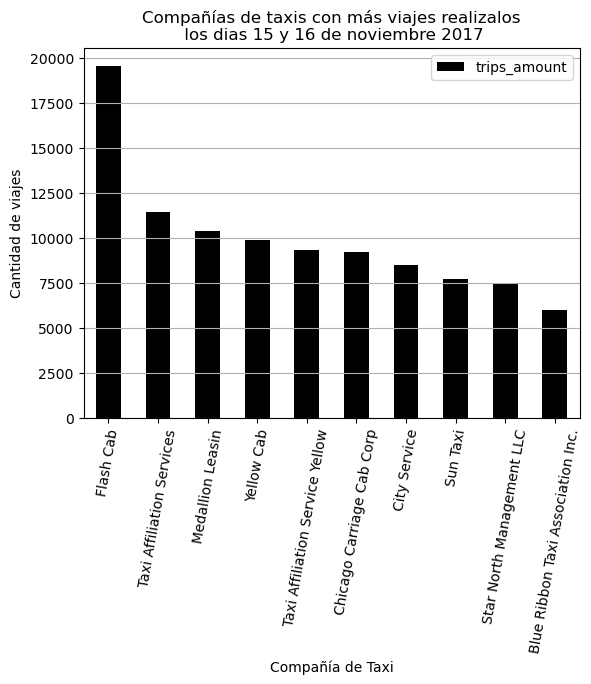

In [104]:
#graficos compañias más populares 
plt.figure(figsize=(100,15))
trips_upper_5000.plot(kind='bar', x='company_name', y='trips_amount', color='black')
plt.xlabel('Compañía de Taxi')
plt.ylabel('Cantidad de viajes')
plt.title('Compañías de taxis con más viajes realizalos\n los dias 15 y 16 de noviembre 2017')
plt.grid(axis='y')
plt.xticks(rotation=80)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 5000x1500 with 0 Axes>

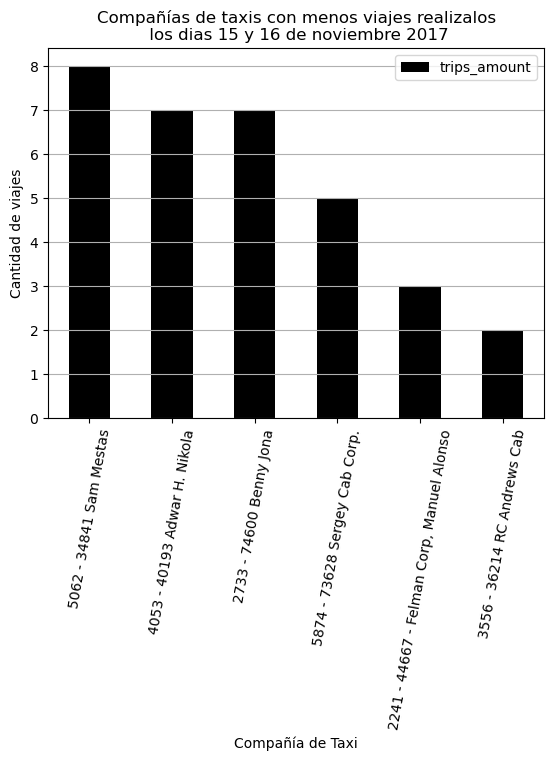

In [105]:
#las compañías menos populares, menos de 10 viajes registrados

plt.figure(figsize=(50,15))
trips_under_10.plot(kind='bar', x='company_name', y='trips_amount', color='black')
plt.xlabel('Compañía de Taxi')
plt.ylabel('Cantidad de viajes')
plt.title('Compañías de taxis con menos viajes realizalos\n los dias 15 y 16 de noviembre 2017')
plt.grid(axis='y')
plt.xticks(rotation=80)
plt.show

In [106]:
# Los 10 principales barrios de Chicago a los que se dirigieron los usuarios en noviembre del año 2017 
#se obtienen los 10 barrios de destino con promedio más alto de viajes, solo se utiliza head(10)
#no se ordenan los datos porque ya lo están, desde el proceso previo de SQL 
dropoff_10 = df_dropoff_location.head(10)
dropoff_10

,dropoff_location_name,average_trips
0,Loop,10727.467
1,River North,9523.667
2,Streeterville,6664.667
3,West Loop,5163.667
4,O'Hare,2546.900
5,Lake View,2420.967
6,Grant Park,2068.533
7,Museum Campus,1510.000
8,Gold Coast,1364.233
9,Sheffield & DePaul,1259.767


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 10000x2000 with 0 Axes>

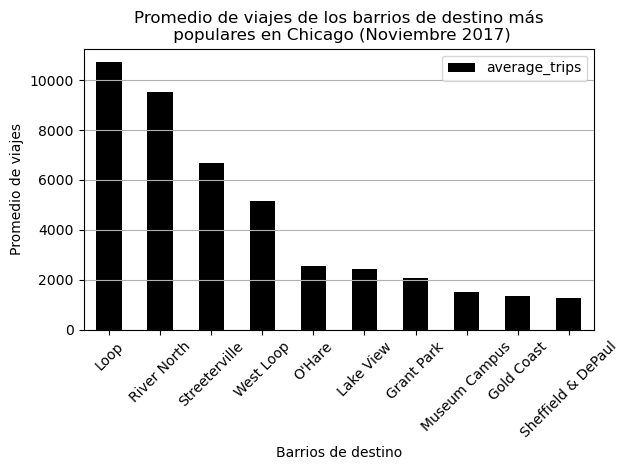

In [107]:
#grafico de los 10 principales barrios de Chicago a los que se dirigieron los usuarios en noviembre del año 2017 

plt.figure(figsize= (100, 20))
dropoff_10.plot(kind= 'bar', x ='dropoff_location_name', y= 'average_trips', color = 'black')
plt.xlabel('Barrios de destino')
plt.ylabel('Promedio de viajes')
plt.title('Promedio de viajes de los barrios de destino más\n populares en Chicago (Noviembre 2017)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

Analizando los gráficos se puede rescatar que las compañías de Taxis que más registraron viajes los días 15 y 16 de Noviembre fueron 
1. Flash Cab (19558) 
2. Taxi Affiliation Services (11422)
3. Medallion Leasin	(10367)
4. Yellow Cab (9888)
5. Taxi Affiliation Service Yellow (9299)
6. Chicago Carriage Cab Corp (9181)
7. City Service	(8448)
8. Sun Taxi	(7701)
9. Star North Management LLC (7455)
10. Blue Ribbon Taxi Association Inc. (5953)


Por otro lado las compañías de Taxis que regitraron menos viajes para esos días fueron las empresas: 
1. 5062 - 34841 Sam Mestas	(8)
2. 4053 - 40193 Adwar H. Nikola	(7)
3. 2733 - 74600 Benny Jona	(7)
4. 5874 - 73628 Sergey Cab Corp. (5)
5. 2241 - 44667 - Felman Corp, Manuel Alonso (3)
6. 3556 - 36214 RC Andrews Cab	(2)


Con respecto a los barrios más populares de destino en Noviembre para la ciudad de Chicago se encuentran: 
1. Loop	(10727.467)*
2. River North	(9523.667)
3. Streeterville (6664.667)
4. West Loop	(5163.667)
5. O'Hare	(2546.900)
6. Lake View	(2420.967)
7. Grant Park	(2068.533)
8. Museum Campus	(1510.000)
9. Gold Coast	(1364.233)
10. Sheffield & DePaul	(1259.767)

*promedio de los viajes que terminaron en cada barrio, aplica para todos los datos del listado.



#### ETAPA 3: Prueba de hipótesis 

Se probará la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

H0 (hipótesis nula): "La duración promedio de los viajes los días sábado con lluvia es igual a los días sábado sin lluvia desde Loop al Aeropuerto O'Hare"
H1 (hipótesis alternativa): "La duración promedio de los viajes los días sábado con lluvia cambia con respecto a los días sábado sin lluvia desde el Loop al Aeropuerto O'Hare"

Lo primero que se realizará es separar los datos en dos DF:
Uno que contenga los datos de los viajes realizados los días sábados en que hubo lluvia, y otro que contenga los viajes de los días sábados sin lluvia. Para poder asi probar la hipótesis. 

NOTA IMPORTANTE: El archivo 'project_sql_results_07.csv' ya contiene la información solo para los días Sábados. 

Se utilizará una prueba de hipótesis de dos colas, ya que lo que se necesita probar es si la media de estas dos poblaciones son distintas (tanto mayor o menor)

Se utilizará un valor umbral alfa de 5%. 

In [108]:
# crear data frame de los sábados lluviosos y no lluviosos
rainy_sat = df_loop_ohare[df_loop_ohare['weather_conditions']== 'Bad'] #sabados lluviosos
rainy_sat = rainy_sat['duration_seconds'] ##obtengo un series con los datos para utilizar en la prueba de hipotesis
sat_without_rain = df_loop_ohare[df_loop_ohare['weather_conditions']== 'Good'] #sabados no lluviosos
sat_without_rain = sat_without_rain['duration_seconds']  ##obtengo un series con los datos para utilizar en la prueba de hipotesis


In [109]:
#Prueba de hipótesis 
alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(rainy_sat, sat_without_rain, equal_var=False) # realizar una prueba, equal_var=False asume una varianza distinta para las muestras

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  9.126383933880083e-08
Rechazamos la hipótesis nula


El valor de p es mucho más bajo que el nivel de significancia por lo que se rechaza la hipótesis nula y se acepta la hipótesis alternativa de que los tiempo promedio de duración de los viajes es distinto los días sábados con lluvia de los días sábado sin lluvia en el recorrido que va desde Loop al Aeropuerto O'Hare. 


---

### CONCLUSIONES GENERALES DEL PROYECTO

Al iniciar el proyecto se detectaron algunos problemas con los tipos de datos, los que fueron cambiados a tipos más adecuados y además se eliminaron duplicados, los que podrian deberse a problemas de procesamiento previo de los datos (la etapa de procesamiento en SQl por ejemplo), o también, no se puede descartar, algun fallo en el registro de la aplicación. Sin embargo, en esta etapa se resolvieron todos los probelmas de formato para pasar de manera efectiva a la etapa de analisis. 


Al analizar los gráficos, se puede rescatar que las compañías de Taxis que más registraron viajes los días 15 y 16 de Noviembre fueron:
1. Flash Cab (19558) 
2. Taxi Affiliation Services (11422)
3. Medallion Leasin	(10367)
4. Yellow Cab (9888)
5. Taxi Affiliation Service Yellow (9299)
6. Chicago Carriage Cab Corp (9181)
7. City Service	(8448)
8. Sun Taxi	(7701)
9. Star North Management LLC (7455)
10. Blue Ribbon Taxi Association Inc. (5953)

Muy probablemente coincidan con compañías grandes, con mucho flujo de vehículos y que transitan por barrios populares y concurridos.

Por otro lado las compañías de Taxis que regitraron menos viajes para esos días fueron las empresas: 
1. 5062 - 34841 Sam Mestas	(8)
2. 4053 - 40193 Adwar H. Nikola	(7)
3. 2733 - 74600 Benny Jona	(7)
4. 5874 - 73628 Sergey Cab Corp. (5)
5. 2241 - 44667 - Felman Corp, Manuel Alonso (3)
6. 3556 - 36214 RC Andrews Cab	(2)

Estas compañías menos populares poseen un patrón similar, es posible que sean empresas muy pequeñas o personas particulares. 


Con respecto a los barrios más populares de destino en Noviembre para la ciudad de Chicago se encuentran: 
1. Loop	(10727.467)*
2. River North	(9523.667)
3. Streeterville (6664.667)
4. West Loop	(5163.667)
5. O'Hare	(2546.900)
6. Lake View	(2420.967)
7. Grant Park	(2068.533)
8. Museum Campus	(1510.000)
9. Gold Coast	(1364.233)
10. Sheffield & DePaul	(1259.767)

*promedio de los viajes que terminaron en cada barrio, aplica para todos los datos del listado.

El barrio Chicago Loop figura en esta lista como el que posee el mayor promedio de viajes para Noviembre, no debe ser casualidad, pues corresponde a un Área comunitaria y Distrito central de negocios, donde se sitúan muchos teatros, tiendas y parques, por lo que en los ultimos meses del año y cercano a las fiestas, es de preveer que exista más circulación de personas y usuarios del servicio. 
Los demás barrios que figuran en la lista, igualmente son muy populares, tanto para residentes como turistas. 

Finalmente, en la prueba de hipótesis "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos", se utilizó una prueba de hipótesis de dos colas, ya que lo que se necesitaba probar fue si la media de dos poblaciones es distintas (tanto mayor o menor) y se utilizó un valor umbral alfa de 5%. Concluyendo que se rechaza la hipótesis nula (que no cambia la duración promedio de los viajes) y se acepta la hipótesis alternativa de que los tiempo promedio de duración de los viajes efectivamente es distinto los días sábados con lluvia de los días sábado sin lluvia en el recorrido que va desde Loop al Aeropuerto O'Hare. 


